# Pontifícia Universidade Católica do Paraná
## Disciplina: Técnicas de Machine Learning
#### Conteúdo complementar da Semana 3 - ML

A ideia deste notebook é a de realizarmos o processo de treinamento e previsão de modelos de aprendizagem supervisionada. Logo, ele estará dividido em três partes: regressão, classificação e séries temporais. Cada um deles utilizará técnicas diferentes para alcançar os resultados.

Aproveite este notebook para entender as funções e, quando tiver alguma dúvida sobre o significado de algum novo parâmetro, procurar na documentação oficial das bibliotecas para entender melhor quais são as possibilidades. Exemplo: <em>"o que significa o</em> ```sep``` <em>no pd.read.csv?"</em>

Na unidade comentamos também sobre outras bibliotecas como o LightGBM, XGBoost e Prophet. Utilizaremos elas aqui, mas note que elas funcionam de forma bem similar com o scikit-learn:
- <a href="https://lightgbm.readthedocs.io/en/latest/">LightGBM</a>
- <a href="https://facebook.github.io/prophet/docs/quick_start.html#python-api">Prophet</a>
- <a href="https://xgboost.readthedocs.io/en/latest/">XGBoost</a>

**AVISO:** este notebook trata somente do passo de treinamento e não foca no passo anterior de preparação do dataset. É por isso que não mostramos técnicas de aprendizagem não-supervisionada aqui. Por outro lado, lembre-se que em bases de dados reais precisaremos aplicar tais técnicas.

In [1]:
import pandas as pd # importando o pandas para manipularmos os datasets

from prophet import Prophet # utilizado para séries temporais
from sklearn.model_selection import train_test_split # utilizado para o split entre treinamento e teste
from sklearn.ensemble import RandomForestRegressor # random forest para regressão
from sklearn.ensemble import RandomForestClassifier # random forest para classificação
from lightgbm import LGBMRegressor # LightGBM para regressão
from xgboost import XGBClassifier # XGBoost para classificação

Importing plotly failed. Interactive plots will not work.


## Regressão
Aqui, vamos trabalhar com uma <a href="http://archive.ics.uci.edu/ml/datasets/Wine+Quality">outra base de vinhos</a> da base do repositório do UCI, um repositório de datasets bem conhecido para estudos. Esta base tem uma coluna chamada ```quality```: uma nota dada para o vinho. A nota pode ser interpretada como uma **escala numérica** e, por isso, seria entendida como um problema de regressão.

In [2]:
df_wine = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv', sep=';') # importando a base
df_wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


Neste momento fazemos o split da base entre treinamento e teste. Perceba que primeiro removemos a coluna que queremos prever (```quality```) para o nosso ```X_train_wine``` e ```X_test_wine```. Se não fizermos isso, o ```quality``` também passará a fazer parte da base de treinamento. Ou seja, para prevermos a qualidade do vinho precisaríamos saber com antecedência a qualidade do vinho. Não faz sentido, né?

Faremos isto também com a base de classificação.

In [3]:
# split entre treinamento e teste
X_train_wine, X_test_wine, y_train_wine, y_test_wine = train_test_split(df_wine.drop('quality', axis=1), # aqui informamos os atributos
                                                                        df_wine['quality'], # aqui informamos as labels e na mesma ordem dos atributos
                                                                        test_size=0.20, # informamos a porcentagem de divisão da base. Geralmente é algo entre 20% (0.20) a 35% (0.35)
                                                                        random_state=0) # aqui informamos um "seed". É um valor aleatório e usado para que alguns algoritmos iniciem de forma aleatória a sua divisão.

Faremos agora o treinamento com dois algoritmos. Posteriormente na disciplina aprenderemos sobre as métricas de validação dos algoritmos.

In [4]:
# Treinando com o RandomForestRegressor
modelo_rfr = RandomForestRegressor(random_state=0).fit(X_train_wine, y_train_wine)
predicoes_rfr = modelo_rfr.predict(X_test_wine)

# Treinando com o LightGBM (LGBMRegressor)
modelo_lgbm = LGBMRegressor(random_state=0).fit(X_train_wine, y_train_wine)
predicoes_lgbm = modelo_lgbm.predict(X_test_wine)

Agora criaremos uma visualização conjunta das predições. Compare os resultados: a primeira coluna equivale aos valores reais da base de teste e as outras colunas são as predições.

In [5]:
resultados_regressao = pd.DataFrame(y_test_wine)
resultados_regressao['Predicao_RandomForest'] = predicoes_rfr
resultados_regressao['Predicao_LightGBM'] = predicoes_lgbm

resultados_regressao

,quality,Predicao_RandomForest,Predicao_LightGBM
1109,6,5.38,4.912637
1032,5,4.79,4.931301
1002,7,6.97,7.090392
487,6,5.02,4.931637
979,5,5.17,5.055280
...,...,...,...
794,6,6.40,6.392097
813,4,5.92,5.745451
1322,5,6.48,6.223222
704,4,5.10,4.567332


## Classificação

Aqui trabalharemos com a mesma base dos vinhos (no caso, dos produtores) que já vimos na semana passada. A diferença é que pegaremos de uma base da internet (<a href="http://archive.ics.uci.edu/ml/datasets/Wine">no caso, do UCI</a>), e não do scikit-learn. Esta base não possui o nome das colunas e é por isso que estamos inserindo na mão (é uma boa hora <a href="https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html#pandas.read_csv">para pesquisar</a> sobre os parâmetros ```names``` e ```index_col``` do ```read_csv```).

In [6]:
df_wine_clf = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data',
                          names=['class', 'Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash', 'Magnesium',
                                 'Total phenols', 'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins',
                                 'Color intensity', 'Hue', 'OD280/OD315 of diluted wines', 'Proline'],
                          index_col=False)

df_wine_clf

,class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


Fazendo o mesmo split entre treinamento e teste.

In [7]:
# split entre treinamento e teste
X_train_clf, X_test_clf, y_train_clf, y_test_clf = train_test_split(df_wine_clf.drop('class', axis=1), # aqui informamos os atributos
                                                                    df_wine_clf['class'], # aqui informamos as labels e na mesma ordem dos atributos
                                                                    test_size=0.20, # informamos a porcentagem de divisão da base. Geralmente é algo entre 20% (0.20) a 35% (0.35)
                                                                    random_state=0) # aqui informamos um "seed". É um valor aleatório e usado para que alguns algoritmos iniciem de forma aleatória a sua divisão.

Faremos agora o treinamento com dois algoritmos. Da mesma forma para os problemas de regressão, veremos também na disciplina em um momento seguinte sobre as métricas de validação dos algoritmos.

In [8]:
# Treinando com o RandomForestClassifier
modelo_rfc = RandomForestClassifier(random_state=0).fit(X_train_clf, y_train_clf)
predicoes_rfc = modelo_rfc.predict(X_test_clf)

# Treinando com o XGBoost (XGBClassifier)
modelo_xgb = XGBClassifier(random_state=0).fit(X_train_clf, y_train_clf)
predicoes_xgb = modelo_xgb.predict(X_test_clf)

E, como fizemos anteriormente, agora criaremos uma visualização conjunta das predições. Compare novamente os resultados.

In [9]:
resultados_classificacao = pd.DataFrame(y_test_clf)
resultados_classificacao['Predicao_RandomForest'] = predicoes_rfc
resultados_classificacao['Predicao_XGBoost'] = predicoes_xgb

resultados_classificacao

,class,Predicao_RandomForest,Predicao_XGBoost
54,1,1,1
151,3,3,3
63,2,2,2
55,1,1,1
123,2,2,2
121,2,2,1
7,1,1,1
160,3,3,3
106,2,2,2
90,2,2,2


## Séries temporais (forecasting)

Aqui trabalharemos com a base da cotação do dólar fornecida pelo Banco Central do Brasil (BCB). Note um novo parâmetro: o ```decimal``` do ```read_csv```. Estamos pegando diretamente do BCB e pegando somente os últimos 2 anos de dados (365x2=730 dias).

In [10]:
df_cotacao = pd.read_csv('http://api.bcb.gov.br/dados/serie/bcdata.sgs.10813/dados/ultimos/730?formato=csv',
                         sep=';',
                         decimal=',')

# precisamos converter a coluna "data" para que seja de fato do tipo data
df_cotacao['data'] = pd.to_datetime(df_cotacao['data'], format='%d/%m/%Y')

# para que o Prophet funcione precisamos obrigatoriamente chamar a coluna de data de "ds" e o valor de "y"
df_cotacao = df_cotacao.rename(columns={'data': 'ds', 'valor': 'y'})
df_cotacao

,ds,y
0,2018-10-08,3.7582
1,2018-10-09,3.7385
2,2018-10-10,3.7504
3,2018-10-11,3.7454
4,2018-10-15,3.7326
...,...,...
725,2021-08-27,5.2194
726,2021-08-30,5.1946
727,2021-08-31,5.1427
728,2021-09-01,5.1570


Em séries temporais a divisão de treino e teste é um pouco diferente: geralmente separamos as entradas mais recentes e testamos com as antigas. O ```train_test_split``` divide de forma aleatória e, por isso, não é muito legal de ser usado aqui.

Antes de pegarmos as últimas entradas precisaremos sempre ordenar pela data. Esta base já está ordenada, mas utilizarei o ```sort_values``` mesmo assim para você ver o seu funcionamento. Pegarei os últimos 90 dias para teste.

In [11]:
df_cotacao = df_cotacao.sort_values(by='ds')
df_cotacao_train = df_cotacao.iloc[:-90]
df_cotacao_test = df_cotacao.iloc[-90:]

In [12]:
df_cotacao_train

,ds,y
0,2018-10-08,3.7582
1,2018-10-09,3.7385
2,2018-10-10,3.7504
3,2018-10-11,3.7454
4,2018-10-15,3.7326
...,...,...
635,2021-04-22,5.4964
636,2021-04-23,5.4781
637,2021-04-26,5.4560
638,2021-04-27,5.4418


Agora faremos o treinamento. <a href="https://facebook.github.io/prophet/docs/quick_start.html#python-api">Observe que estou seguindo a documentação do código - não há nenhum segredo aqui.</a>

In [13]:
m = Prophet()
m.fit(df_cotacao_train)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [14]:
future = m.make_future_dataframe(periods=90) # vamos prever os próximos 90 dias para comparar com o que houve na realidade

forecast = m.predict(future) # prevendo os próximos 90 dias
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail() # mostrando as predições (yhat) e intervalos de confiança: máximo (yhat_upper) e mínimo (yhat_lower)

,ds,yhat,yhat_lower,yhat_upper
725,2021-07-23,5.323754,5.140683,5.527878
726,2021-07-24,5.370153,5.173607,5.572414
727,2021-07-25,5.370676,5.182530,5.562821
728,2021-07-26,5.325317,5.129439,5.516870
729,2021-07-27,5.324465,5.127844,5.531198


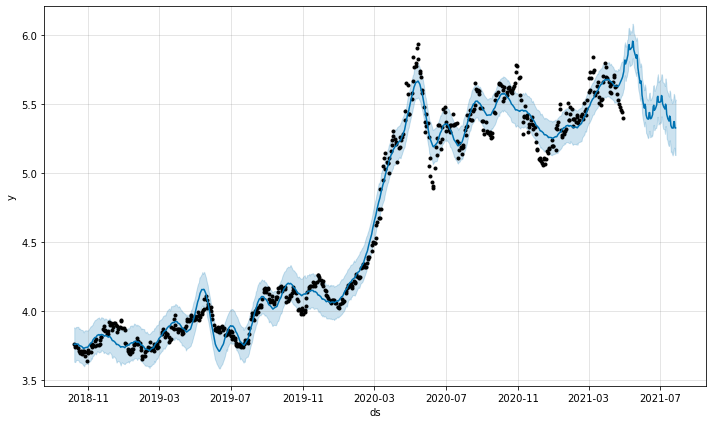

In [15]:
# mostrando os resultados do Prophet
fig = m.plot(forecast)

Mostrando os valores: o ```y``` é o valor real (que o Prophet desconhecia), o ```yhat``` é o valor previsto. Existe também um intervalo de confiança máximo (```yhat_upper```) e mínimo (```yhat_lower```). Veja se o valor real ficou dentro da faixa esperada ou não. Note também que, quanto mais para o futuro olhamos, mais impreciso ele pode ser.

In [16]:
forecast['y'] = df_cotacao_test['y']
forecast[['ds', 'y', 'yhat', 'yhat_lower', 'yhat_upper']].iloc[-90:]

,ds,y,yhat,yhat_lower,yhat_upper
640,2021-04-29,5.3656,5.715923,5.597177,5.833875
641,2021-04-30,5.4030,5.735260,5.609391,5.858434
642,2021-05-01,5.4081,5.800156,5.688196,5.925621
643,2021-05-02,5.4499,5.817908,5.705941,5.945197
644,2021-05-03,5.3866,5.788225,5.665725,5.913136
...,...,...,...,...,...
725,2021-07-23,5.2194,5.323754,5.140683,5.527878
726,2021-07-24,5.1946,5.370153,5.173607,5.572414
727,2021-07-25,5.1427,5.370676,5.182530,5.562821
728,2021-07-26,5.1570,5.325317,5.129439,5.516870
